# **TASK 2**

# Using Keras Ocr

In [ ]:
!pip install keras_ocr
!pip install matplotlib --upgrade

In [5]:
import matplotlib.pyplot as plt
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [2]:
file_paths=[
    '/content/71FBiIeM2mS._SL1500_.jpg',
    '/content/MicrosoftTeams-image.jpg',
    '/content/large.png'     
]          

In [10]:
keras_images = [
    keras_ocr.tools.read(file_path) for file_path in file_paths             
]

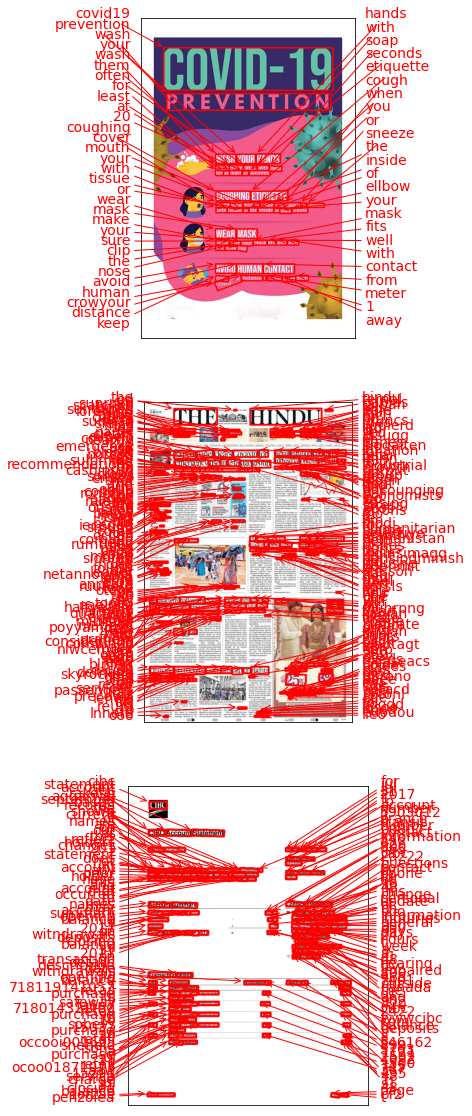

In [5]:
prediction_groups_keras = pipeline.recognize(keras_images)

fig, axs = plt.subplots(nrows=len(keras_images), figsize=(20, 20))
for ax, image, predictions in zip(axs, keras_images, prediction_groups_keras):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)


In [6]:
k=1
for prediction in prediction_groups_keras:
    image_text=""
    for text,box in prediction:
        image_text+=(text+" ")
    print("Image",k)
    k=k+1;
    print(image_text)

Image 1
covid19 prevention hands wash your wash them often with soap for least seconds at 20 coughing etiquette cover mouth when cough your you or sneeze with tissue the inside of ellbow or your wear mask make mask fits well with your sure the clip nose avoid human contact distance from keep meter 1 crowyour away 
Image 2
od ternal hindu the sm suprced gaplas scatches ccmn talban luls eale lnun sunduoes mci on sloie ioretling bruncs rdes iiqulerd tning cotres ects lad d lled dlsugg sumefn sleica thas cl nn ltanes slodalten ses in de inflation panel for retail falls 4350 expert clears covaxin nearby to industrial growth output up 21s in emergency use age group read much dont inlo tlhe encounging dar economists loo blerat botcch csl has sulbmled the recommendations thl xg lo casbinrorl lodg crons easing stress sonses emles shot in the arm ecos ohtie comdlo ronbteo con tooe oacols raleing cude tre onsltig aeo pales errons mo ii te below ljoon cses ea tns bcciln ieceded srouno ta colen tol

# Using Easy Ocr

In [ ]:
!pip install easyocr

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import easyocr
import numpy as np

reader = easyocr.Reader(['en'])

In [5]:
cv_images = []
prediction_groups_easyocr = []
for file_path in file_paths:
    cv_images.append(cv2.imread(file_path))
    prediction_groups_easyocr.append(reader.readtext(file_path))

In [6]:
prediction_groups_easyocr_k=[]
for prediction_group_easyocr in prediction_groups_easyocr:
    prediction_groups_easyocr_k.append([(a[1],np.array(a[0],dtype='float32')) for a in prediction_group_easyocr])

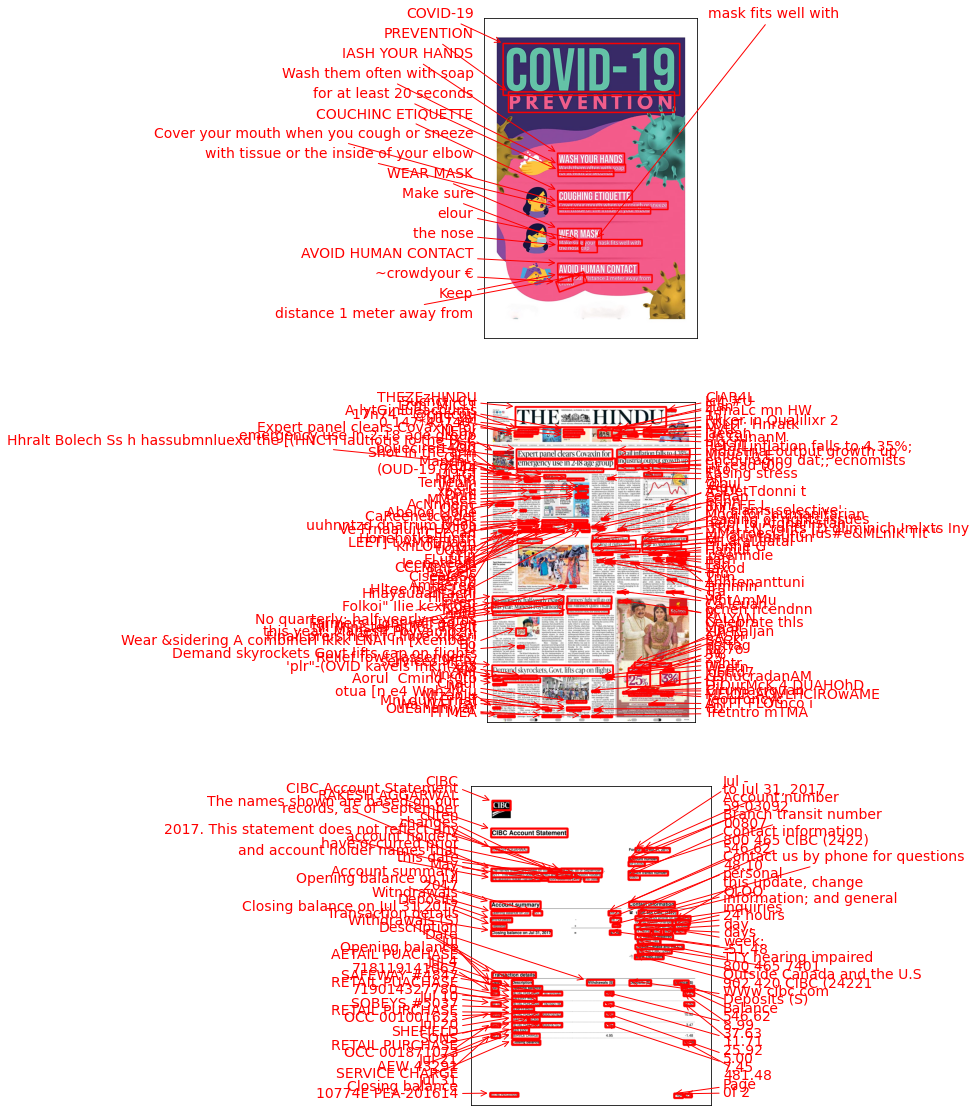

In [11]:
fig, axs = plt.subplots(nrows=len(keras_images), figsize=(20, 20))
for ax, image, predictions in zip(axs, keras_images, prediction_groups_easyocr_k):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

In [12]:
k=1
for prediction in prediction_groups_easyocr_k:
    image_text=""
    for text,box in prediction:
        image_text+=(text+" ")
    print("Image",k)
    k=k+1;
    print(image_text)

Image 1
COVID-19 PREVENTION IASH YOUR HANDS Wash them often with soap for at least 20 seconds COUCHINC ETIQUETTE Cover your mouth when you cough or sneeze with tissue or the inside of your elbow WEAR MASK Make sure mask fits well with the nose elour AVOID HUMAN CONTACT Keep distance 1 meter away from ~crowdyour € 
Image 2
ClAR4L THEZEzHINDU Sucnct -Cu Lcm ;MICLT Iclt #U 4 maLc mn HW A lytGinlueacnums 17n74~ @cnccnu 15 LULIT; Hnratk Rkker in Qualilixr 2 UTT Yal 0 147*49740" Mytk Jaeean Un GunanM nigcm NEay Expert panel clears Covaxin for Retail inflation falls to 4.35%; emergency use in 2-18 age group industrial output growth up [it read t0o into encouraging dat;; ecnomists Dan Hhralt Bolech Ss h hassubmnluexd the [(HNCTI Iautiotis Io the IX C bouecirert4On Easing stress Oictt Shot in the arm Manch _ oxuhi (OUD-19,7044 An Imrtin ULTGI Tenlenm W elc Onnl xpprk MMueE OunT AcNnnenc Abelog Ljone CaReenetce det @bul Mcak #idw CEEcan uuhnntzd dnatrum tnloa Ve Frnaaluiln-UXTUJ LEET]-t AMTtFIaa

# Using Tesseract
 

In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr
!pip install opencv-python --upgrade
!pip install pillow

In [14]:
def preprocessing(img):
    # img = cv2.imread(file_path)
    new_image = img
    img = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((1,1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    # img = cv2.erode(img, kernel, iterations=1)
    # img = cv2.GaussianBlur(img, (5,5), 0)
    # img = cv2.medianBlur(img,5)
    # img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    # cv2_imshow(img)
    return img

In [17]:
import pytesseract
k=1
for cv_image in cv_images:
    text = pytesseract.image_to_string(preprocessing(cv_image))
    print("Image",k)
    k=k+1;
    print(text)

Image 1
7
w

WASH YOUR HANDS

Wash them often with soap
for at least 20 seconds

COUGHING ETIQUETTE

Cover your mouth when you cough or sneeze
Nitta ascU (Molar date asic leKoviAyZelUlaccll oxen'Ny

WEAR MASK

Make sure your mask fits well with
the nose clip

CV TET

Meee distance 1 meter away from
crow

 

Image 2
   
 

 

== THEse2 HINDU

Expert panel clears Covaxin for _ Retail inflation falls to 4.35%;
emergency use in 2-18 age group industrial output growth up

1 too much into the encouraging data economists

Tolan meet ELAS: Capa akeon Kai
feaminqur-Brsels Riders in Quai 2
Pleiesbmasttance — inshafsh a €

    

 

‘Bharat Biotech says has submited the recommendationsto the DCCL

PM slams selective’ Modi for ‘humanitarian
reading of rights issues help’ to Afghanistan

No quarterly, half-yearly exams | Farmers’ fight will goon
this year: Mahesh Poyyamozhi till Minister quits: Tikait

comsideringa combined mock exam in December

Colbrateths Dial wth Kalyan
CASH BACK

at ne i
efor 

# Using docTR
 

In [ ]:
!pip install python-doctr[torch]
!sudo apt-get install fonts-freefont-ttf -y

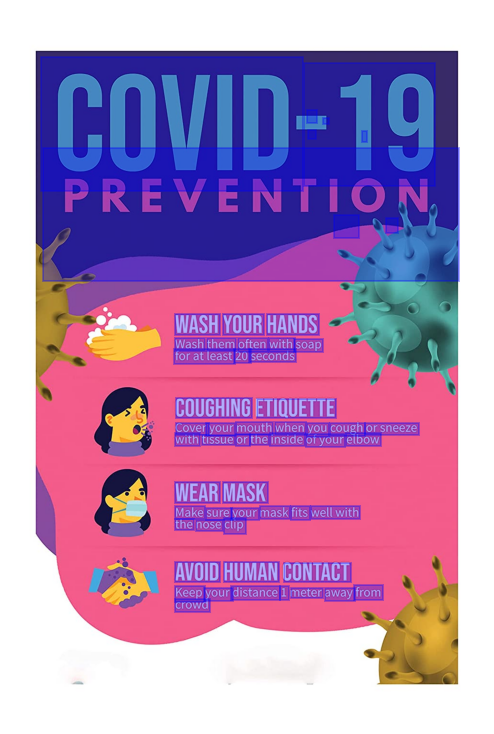

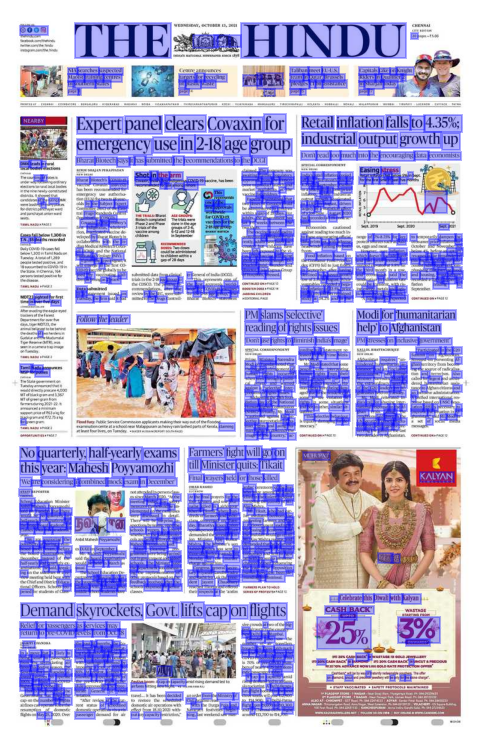

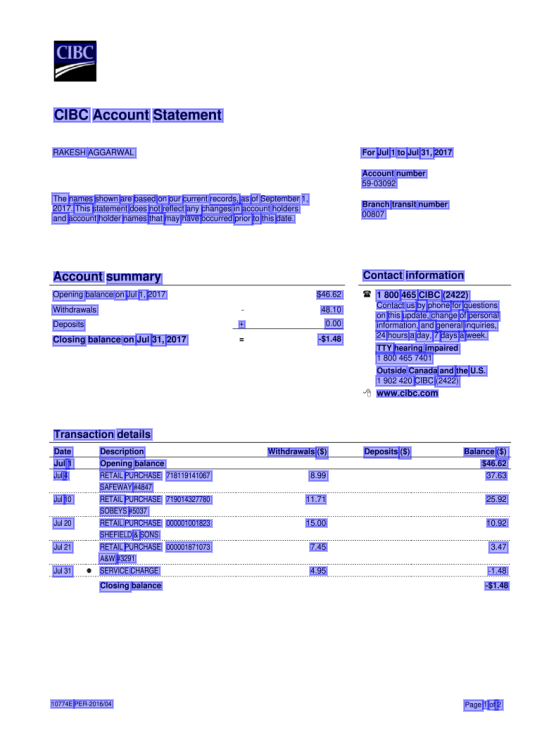

In [3]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

model = ocr_predictor(pretrained=True)
doc = DocumentFile.from_images(file_paths)
result = model(doc)
result.show(doc)

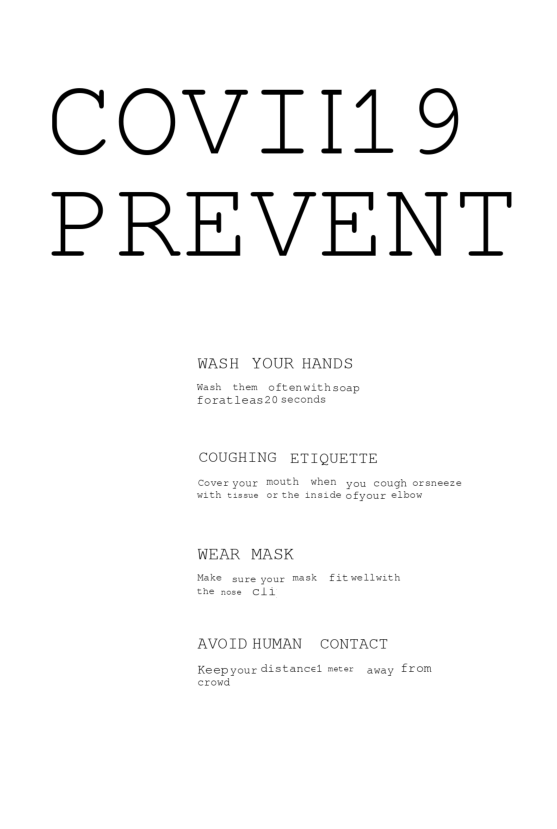

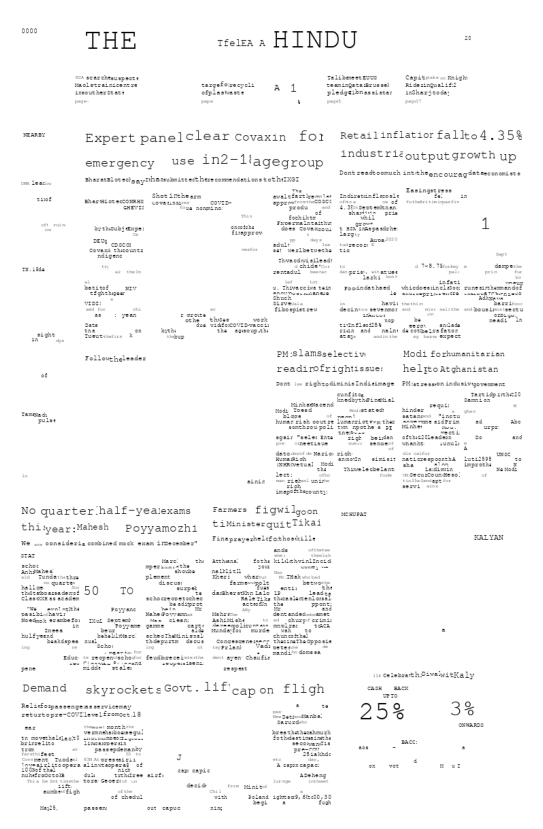

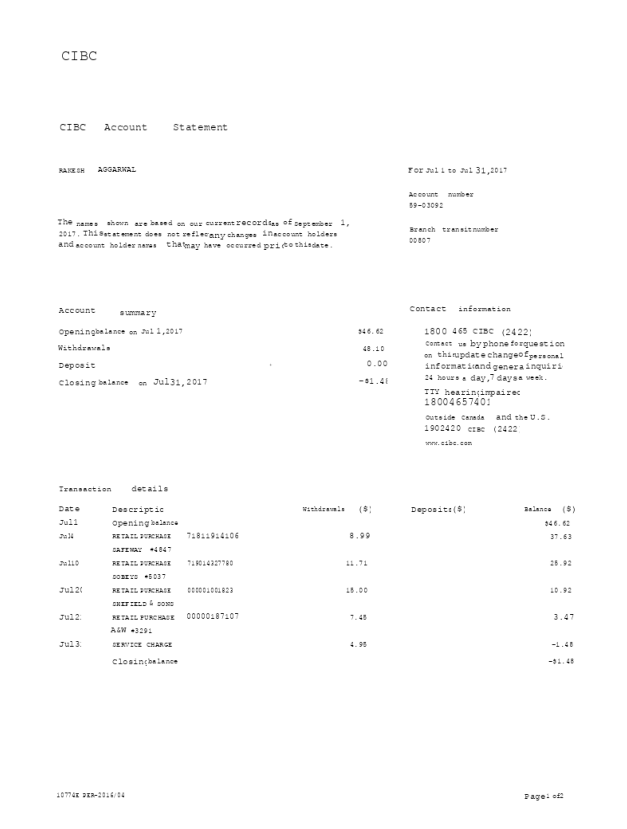

In [6]:
synthetic_pages = result.synthesize()
for i in range(3):
    fig1 = plt.figure(figsize = (15,15))
    plt.imshow(synthetic_pages[i]); plt.axis('off'); plt.show()
    fig1.savefig('image_no_' + str(i+1) + '.png', dpi = 1500)
    print('')